In [1]:
from clscurves.confusion import MetricsGenerator
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [2]:
digits = datasets.load_digits()

In [3]:
X = digits["data"]
y = digits["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.8,
    random_state = np.random.RandomState(0))

In [4]:
random_state = np.random.RandomState(2)
model = LogisticRegression(
    multi_class="multinomial",
    random_state=random_state,
    max_iter=10000)

In [5]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000, multi_class='multinomial',
                   random_state=RandomState(MT19937) at 0x7FAF99470340)

In [6]:
rng = np.random.default_rng(42)
pred_test = model.predict_proba(X_test + 10 * rng.standard_normal(X_test.shape))
pred_train = model.predict_proba(X_train)

y_test_0 = (y_test == 0).astype(int)
y_train_0 = (y_train == 0).astype(int)
pred_test_0 = pred_test[:, 0]
pred_train_0 = pred_train[:, 0]

In [7]:
df_test = pd.DataFrame({
    "label": y_test_0,
    "score": pred_test_0
})

df_train = pd.DataFrame({
    "label": y_train_0,
    "score": pred_train_0
})

In [8]:
mg = MetricsGenerator(
    df_test,
    label_column="label",
    score_column="score",
    score_is_probability=False,
    reverse_thresh=False,
    num_bootstrap_samples=50,
    seed=123,
)

Computing metrics...


100%|██████████| 51/51 [00:02<00:00, 21.63it/s]

Metrics computation complete.


In [9]:
mg.compute_cost()

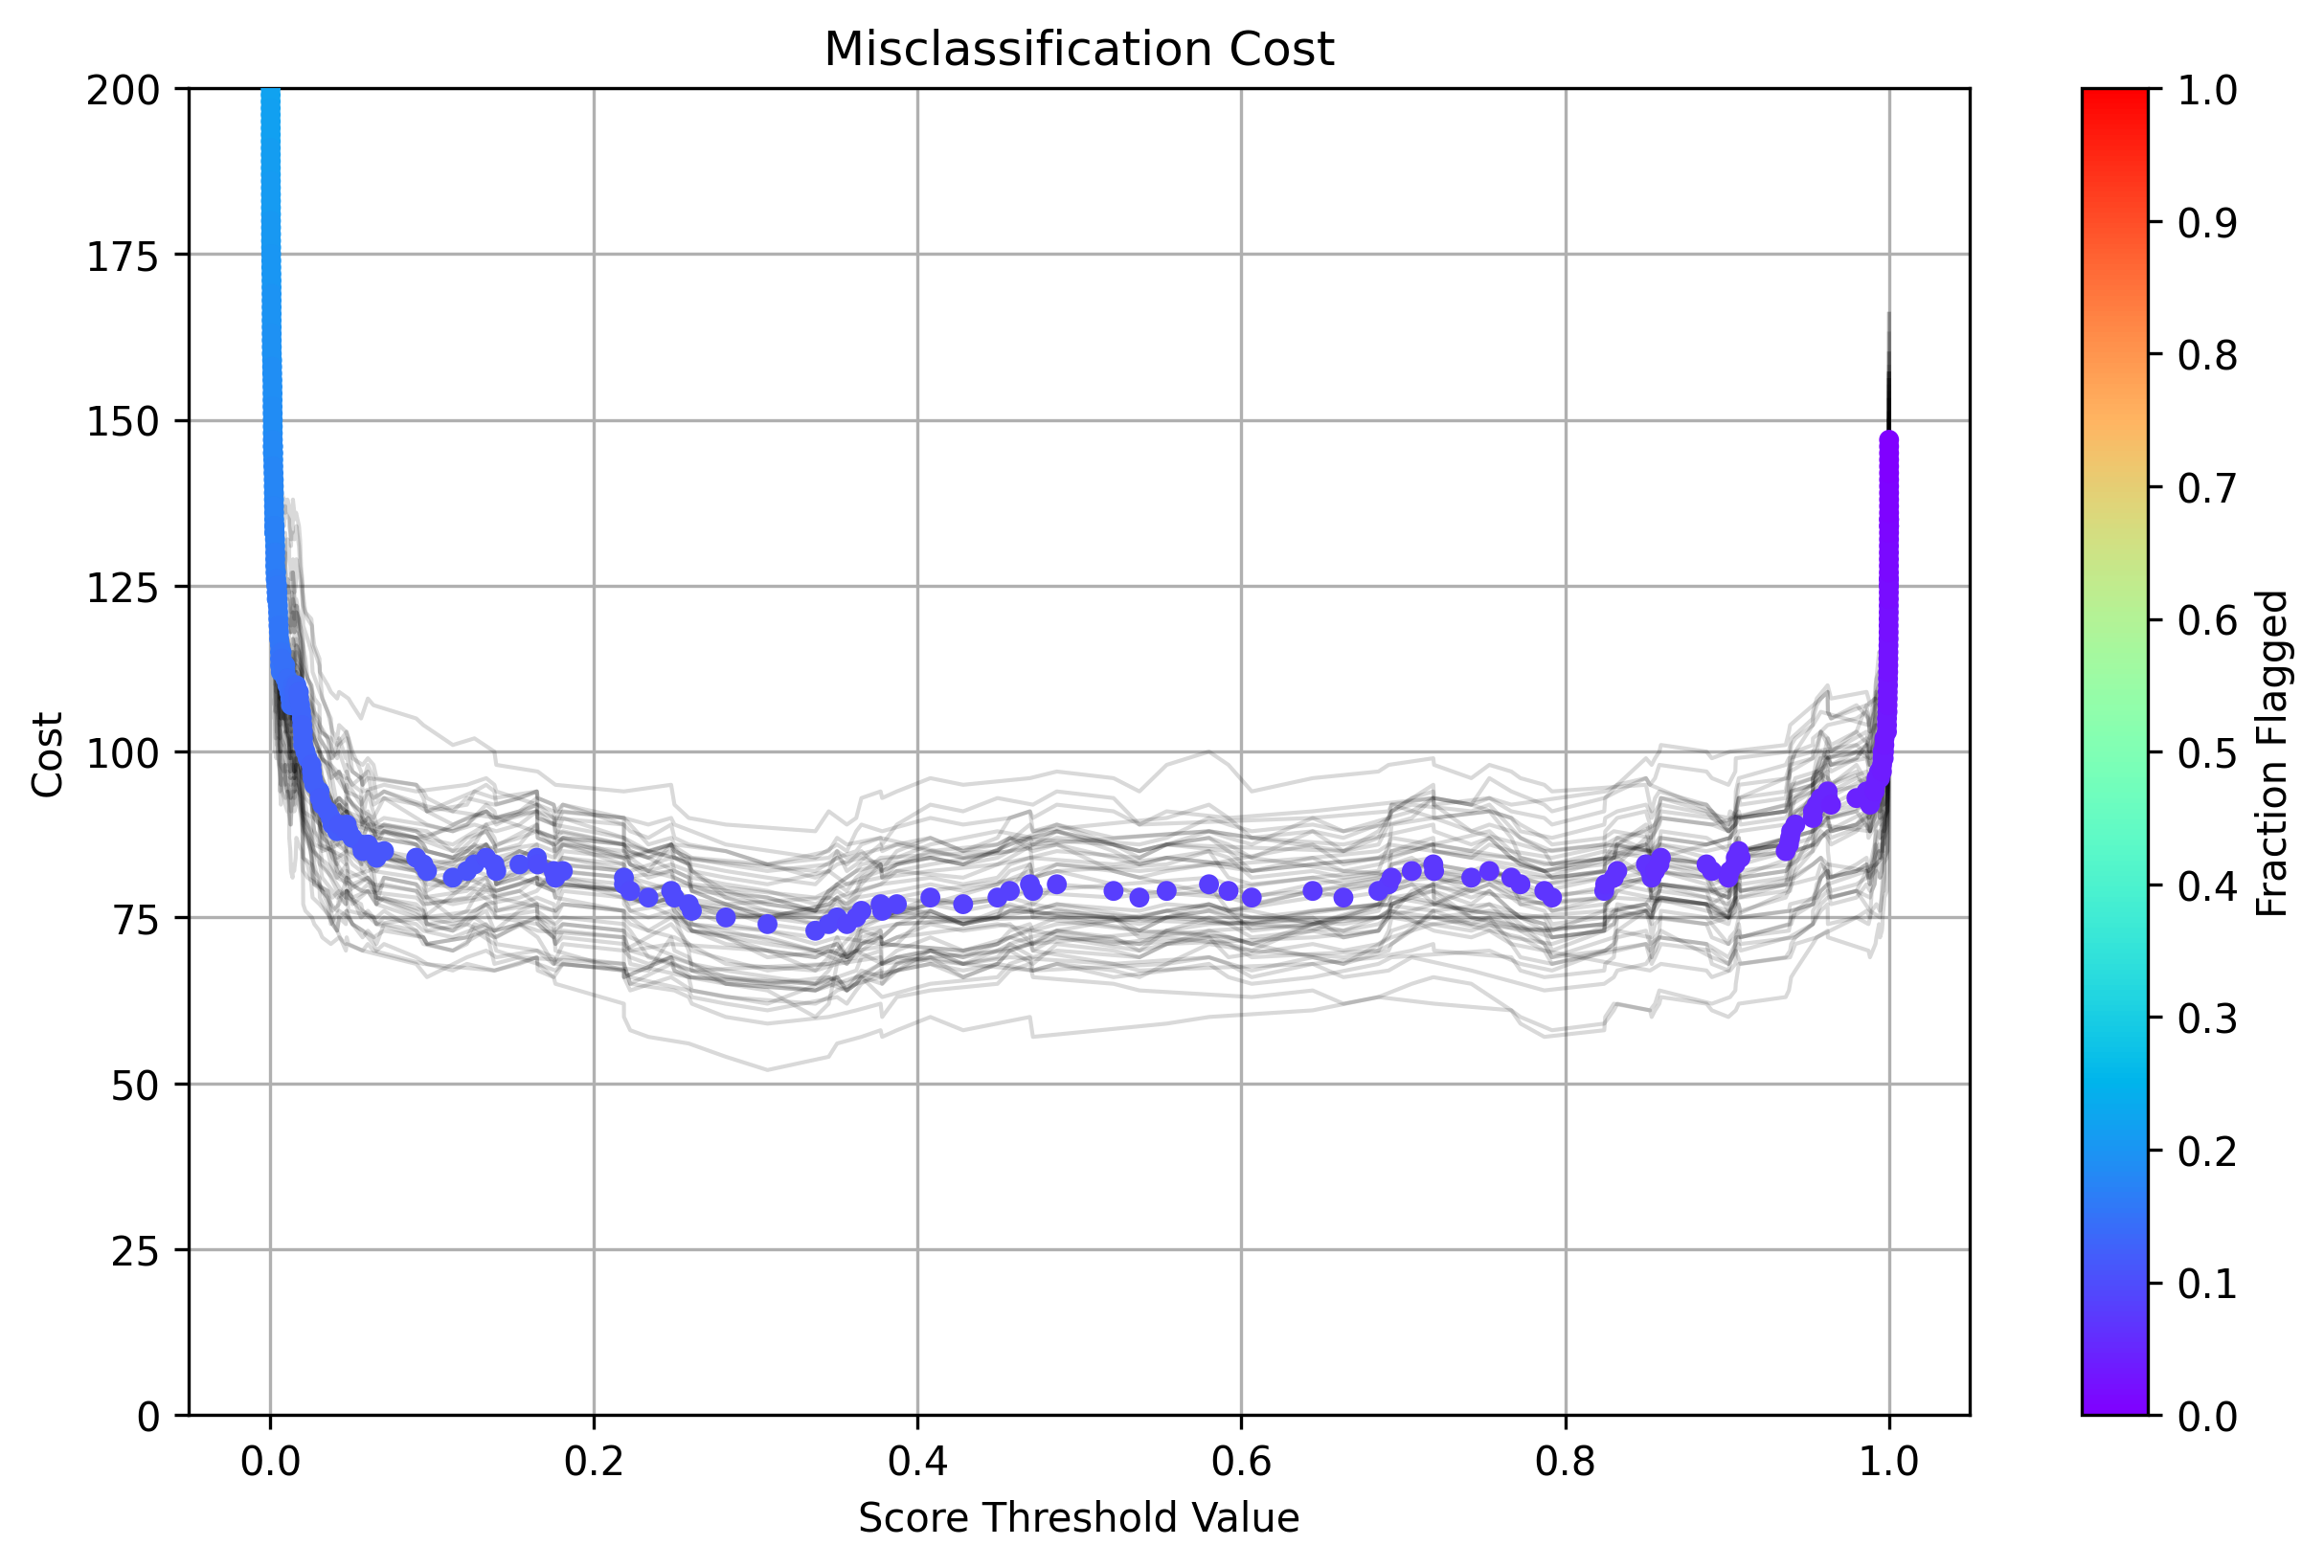

In [10]:
mg.plot_cost(
    y_rng=[0, 200],
    bootstrapped=True,
    dpi=300,
)

Making scatter plot...


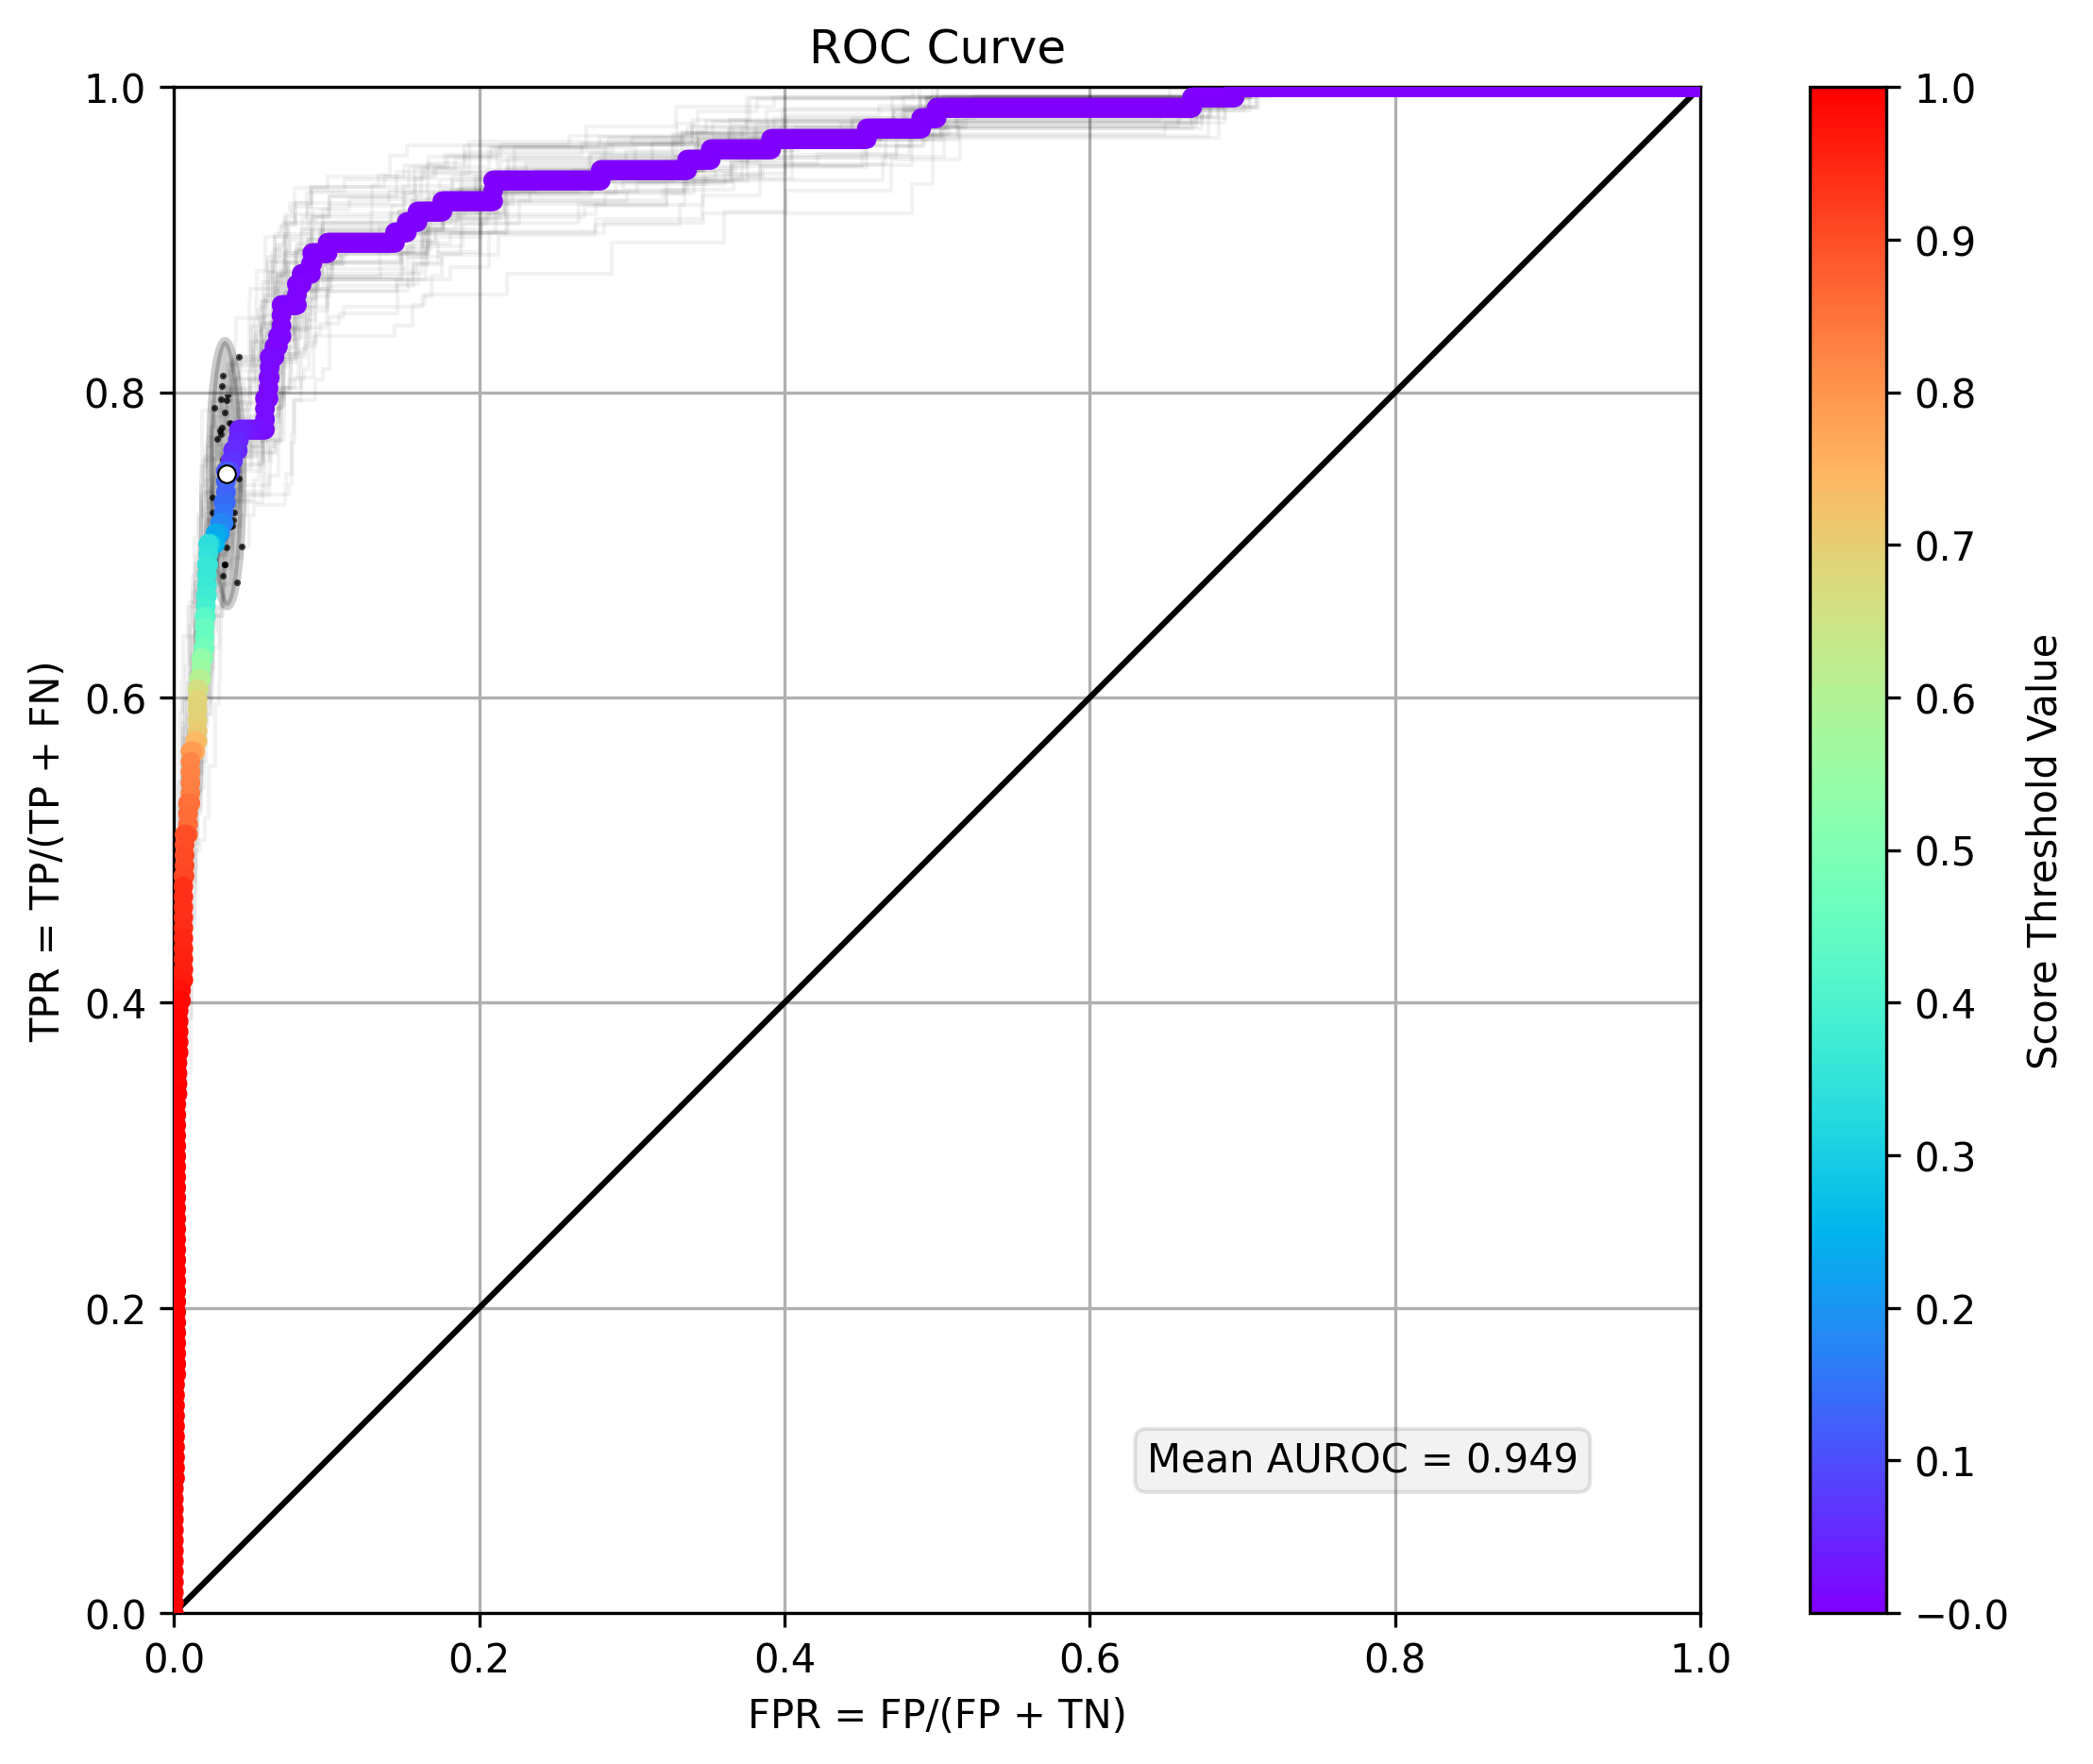

In [12]:
mg.plot_roc(
    op_value = 0.1,
    bootstrapped = True,
    bootstrap_alpha = 0.05,
    dpi = 300)

Making scatter plot...


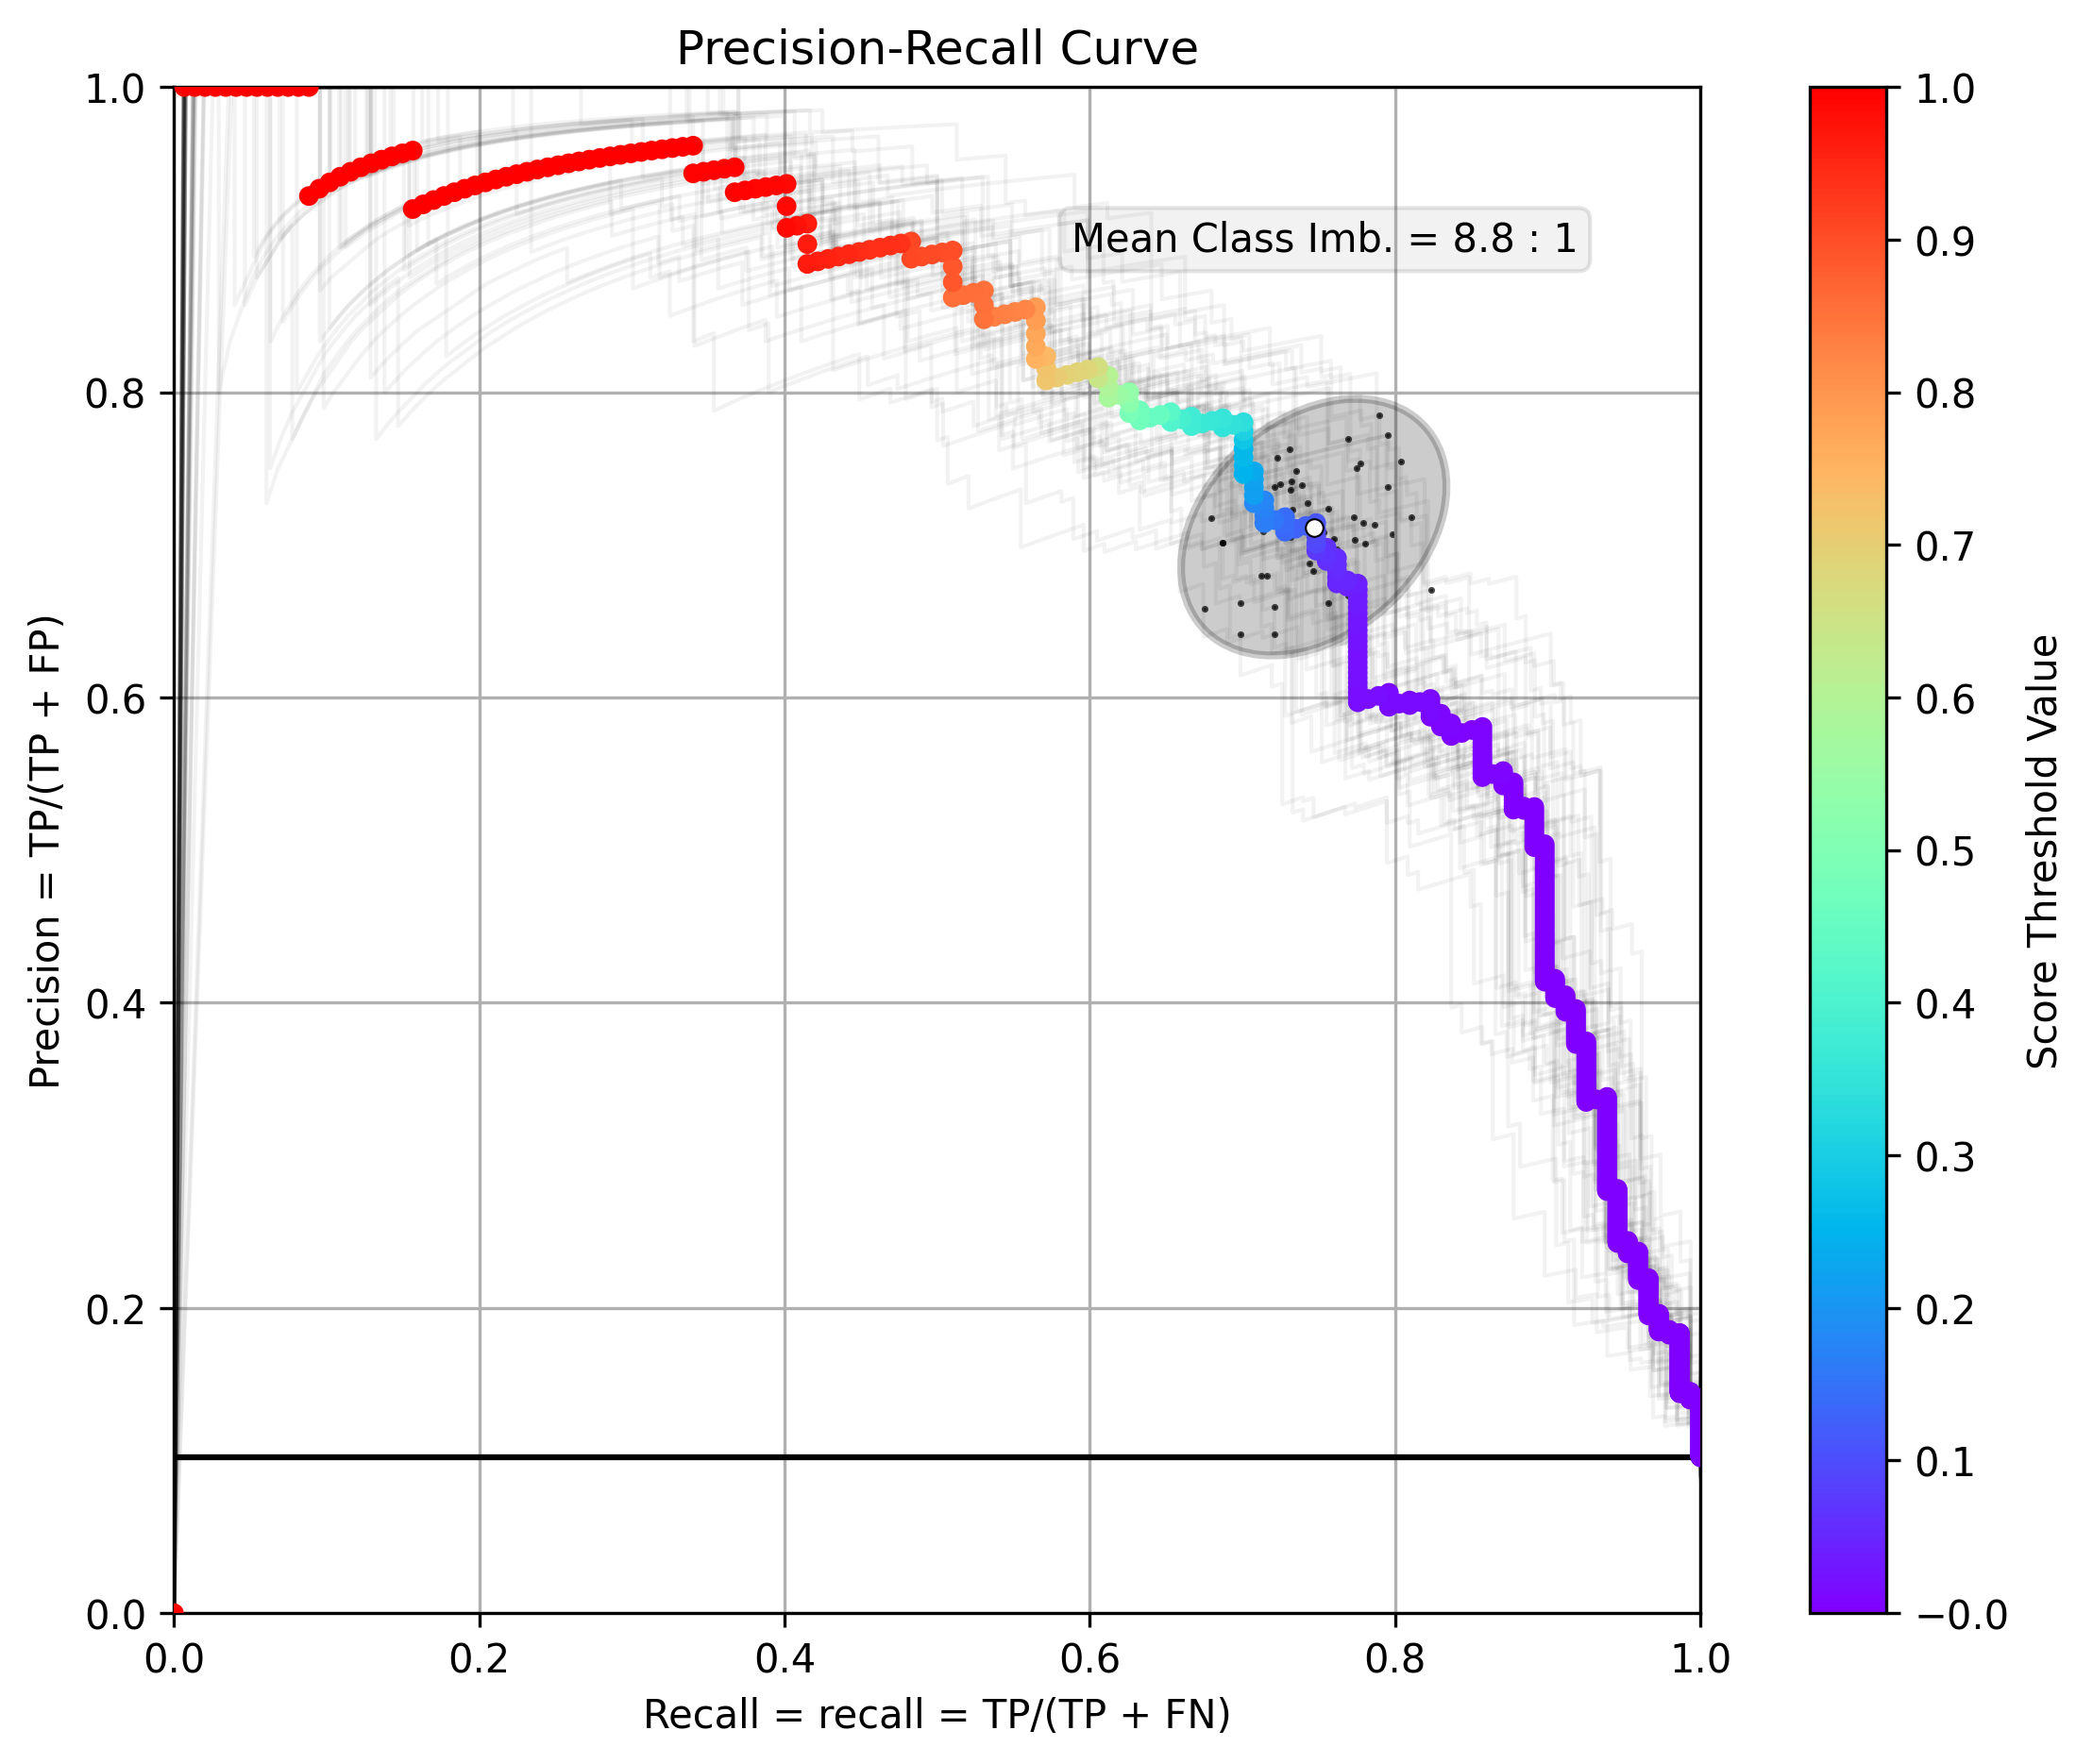

In [13]:
mg.plot_pr(
    op_value=0.1,
    bootstrapped=True,
    bootstrap_alpha=0.05,
    dpi=300,
)

Making scatter plot...


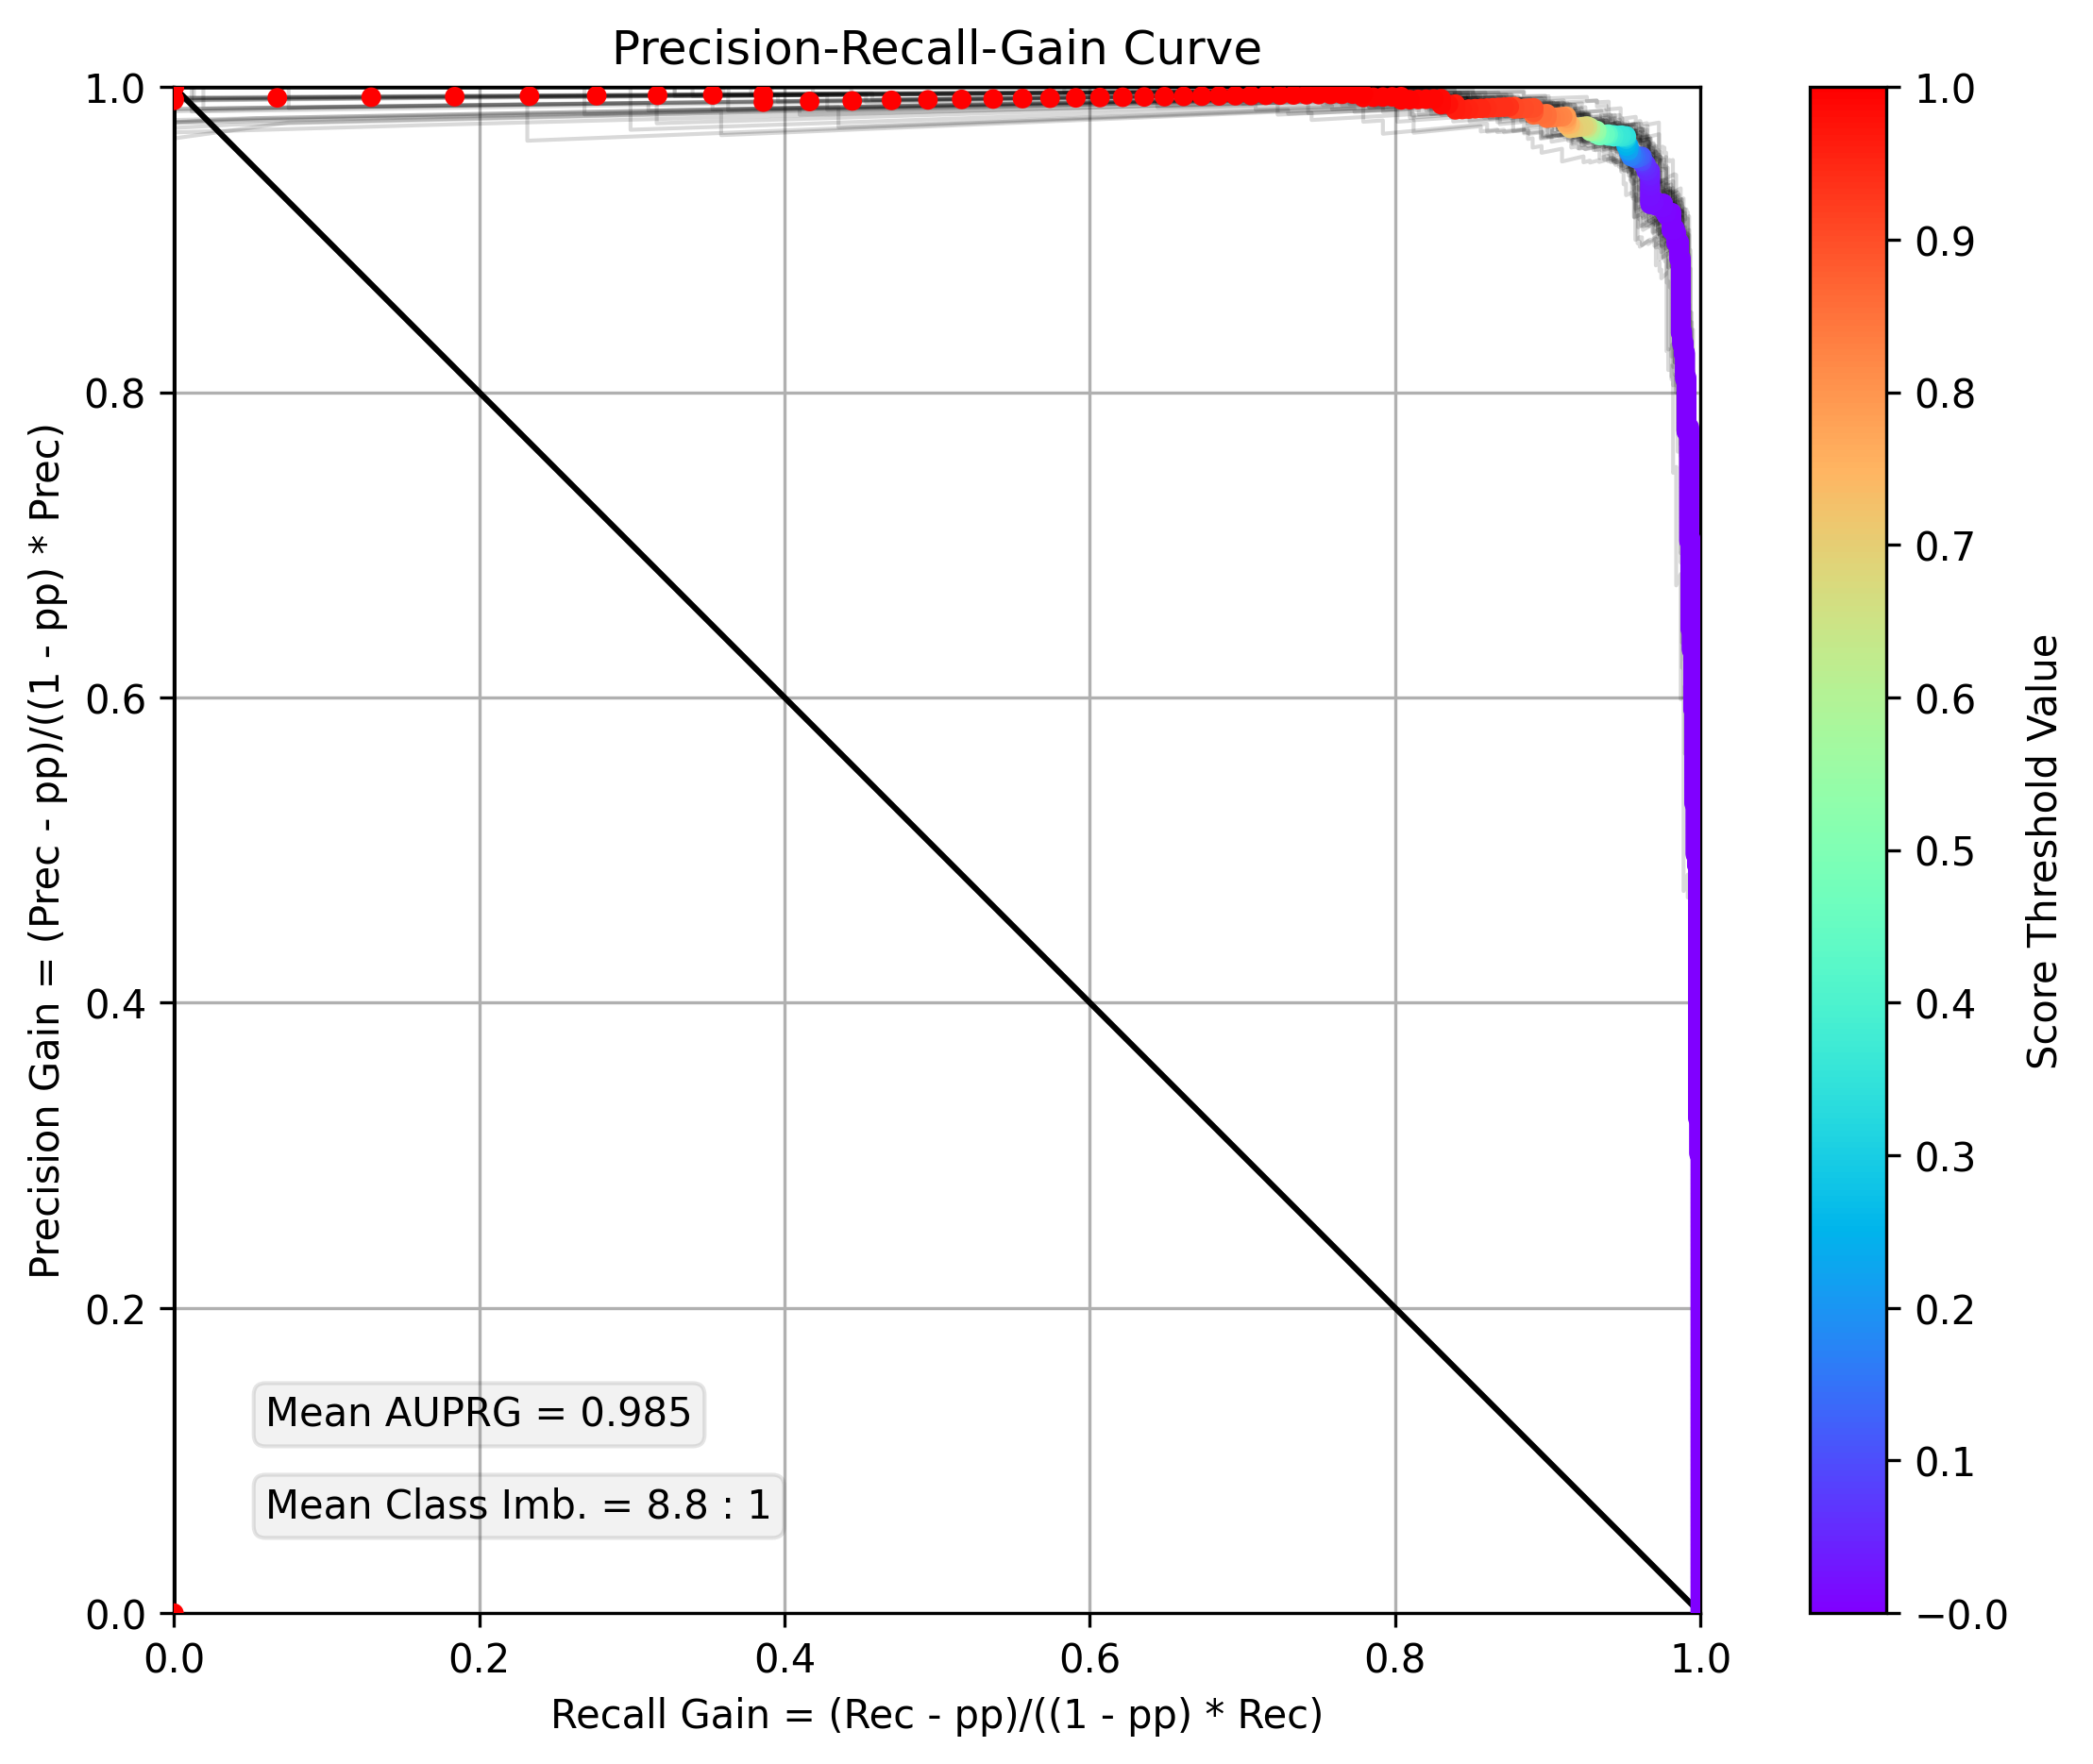

In [14]:
mg.plot_prg(
    bootstrapped=True,
    dpi=300,
)

Making scatter plot...


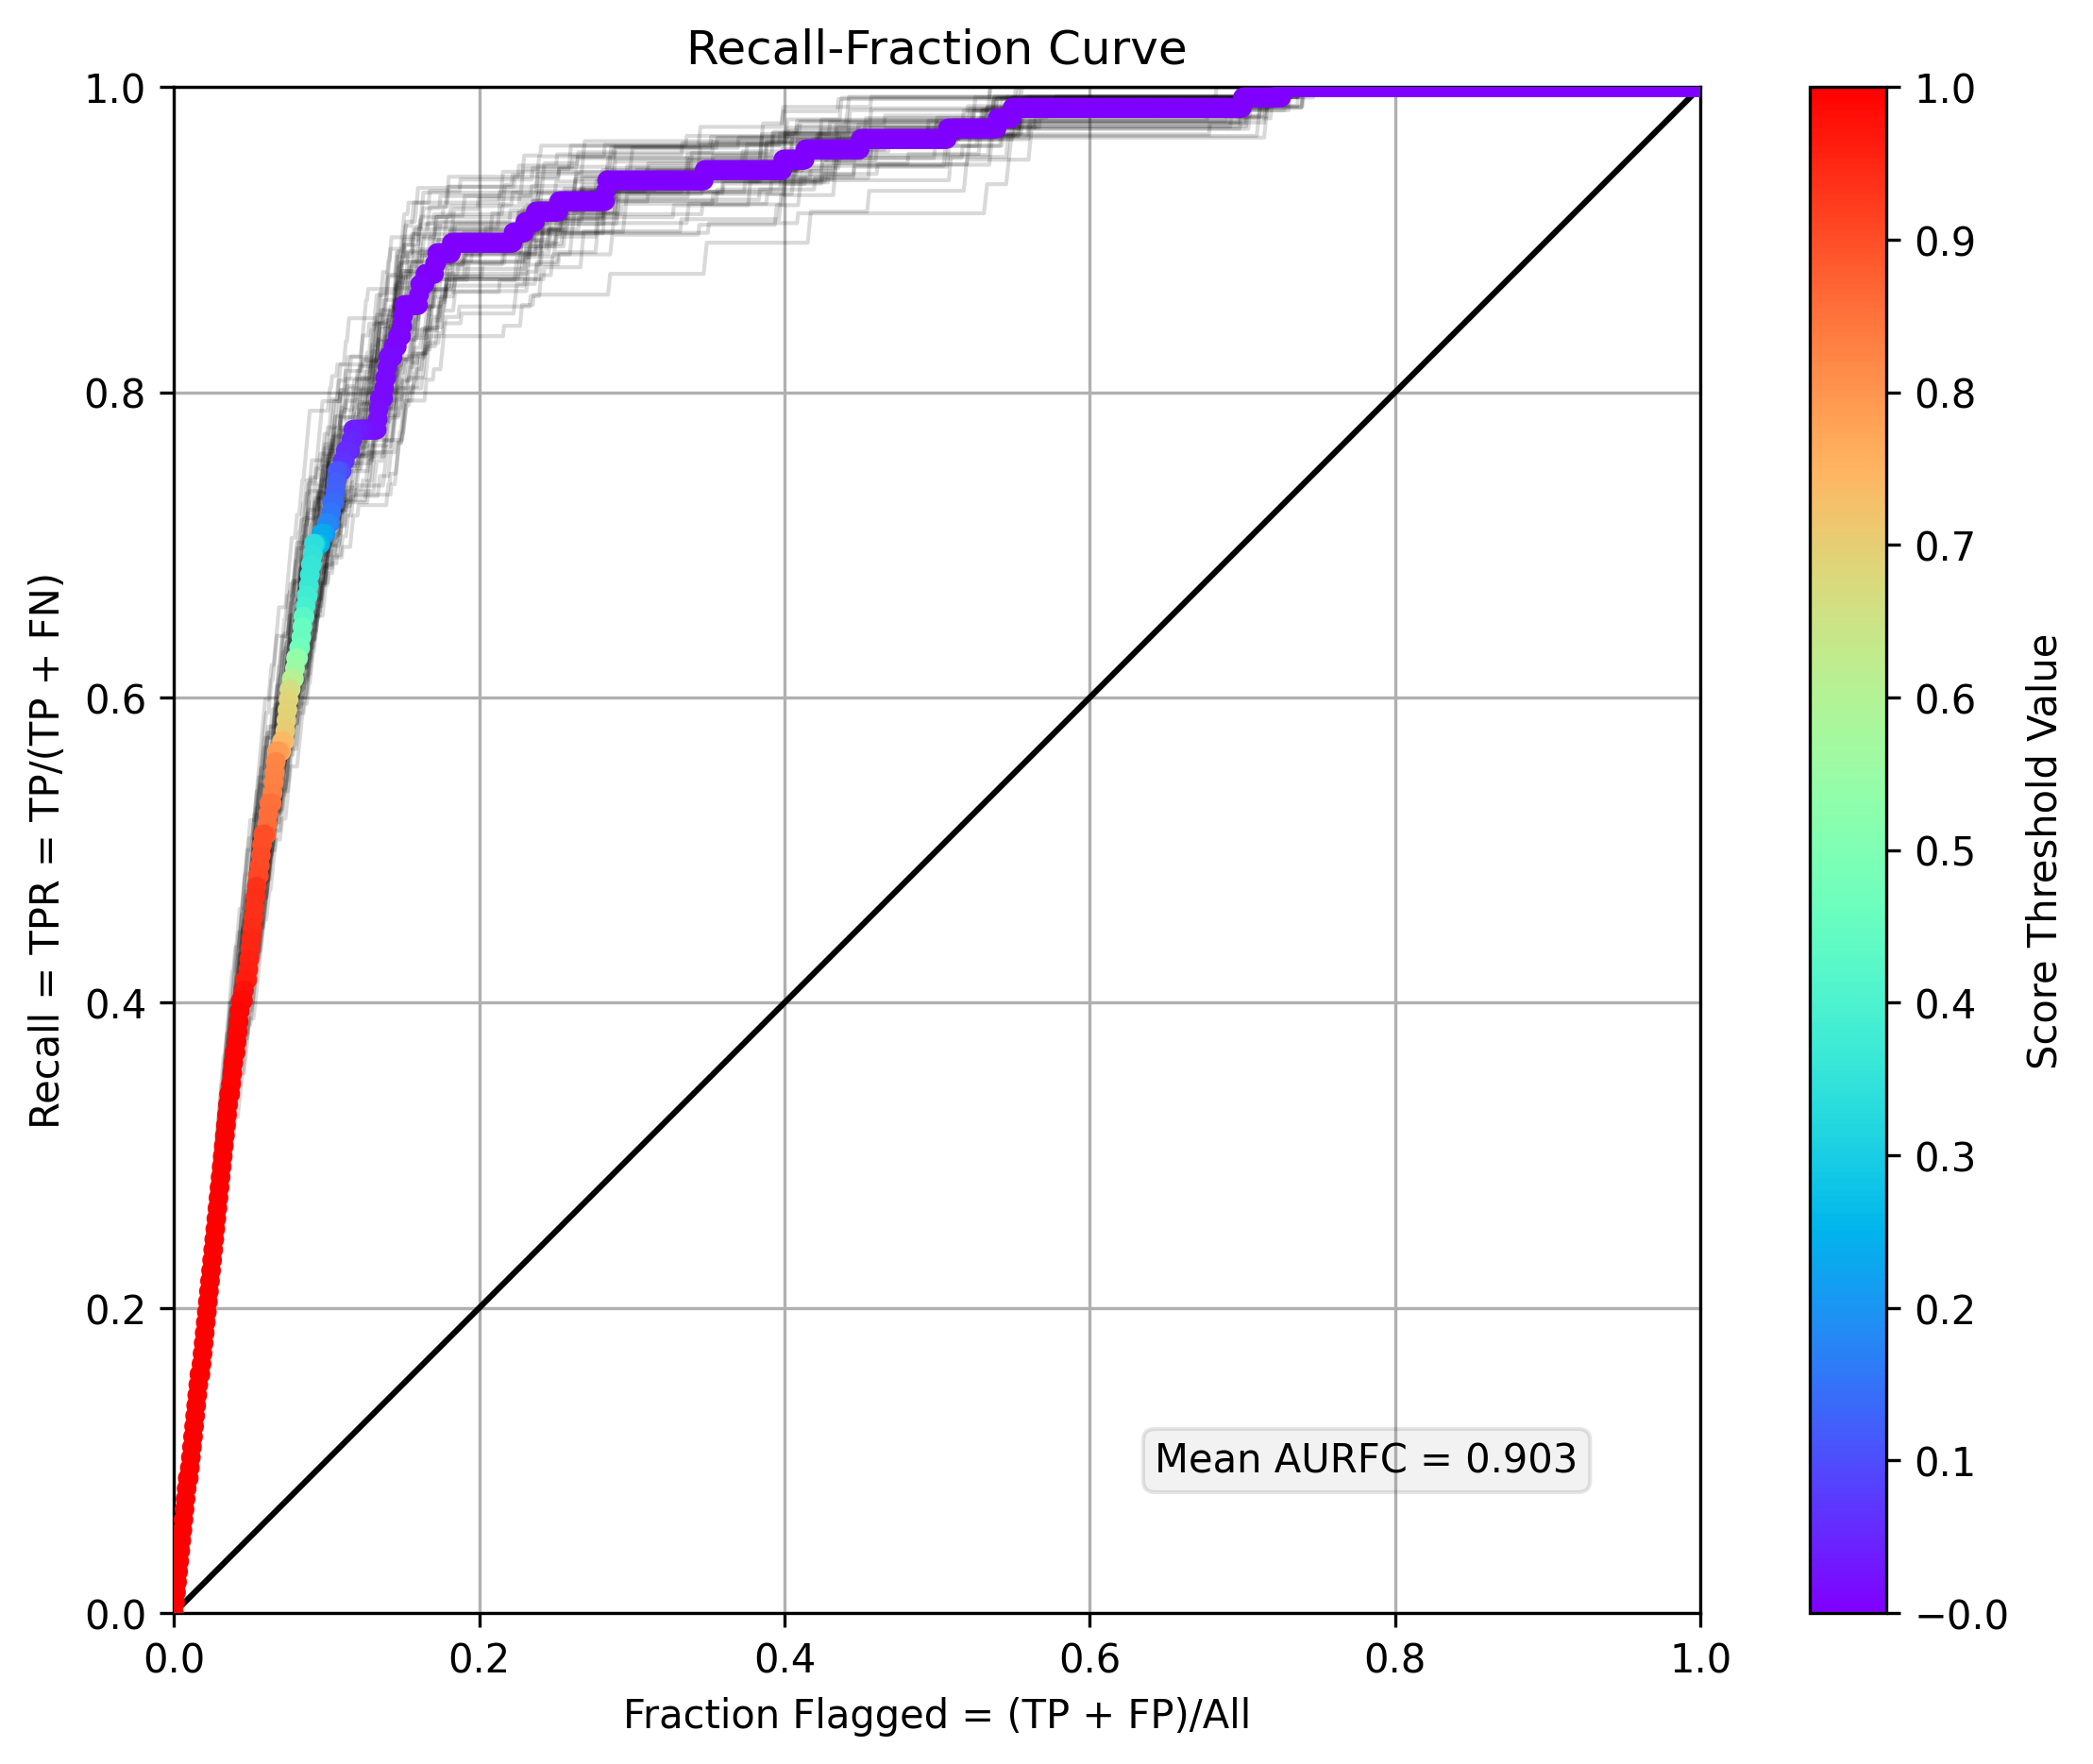

In [15]:
mg.plot_rf(
    bootstrapped=True,
    dpi=300,
    cmap="rainbow",
)

In [16]:
mg.plot_dist(
    bootstrapped=True,
    kind="cdf",
    dpi=300,
)

IndexError: tuple index out of range

Making scatter plot...


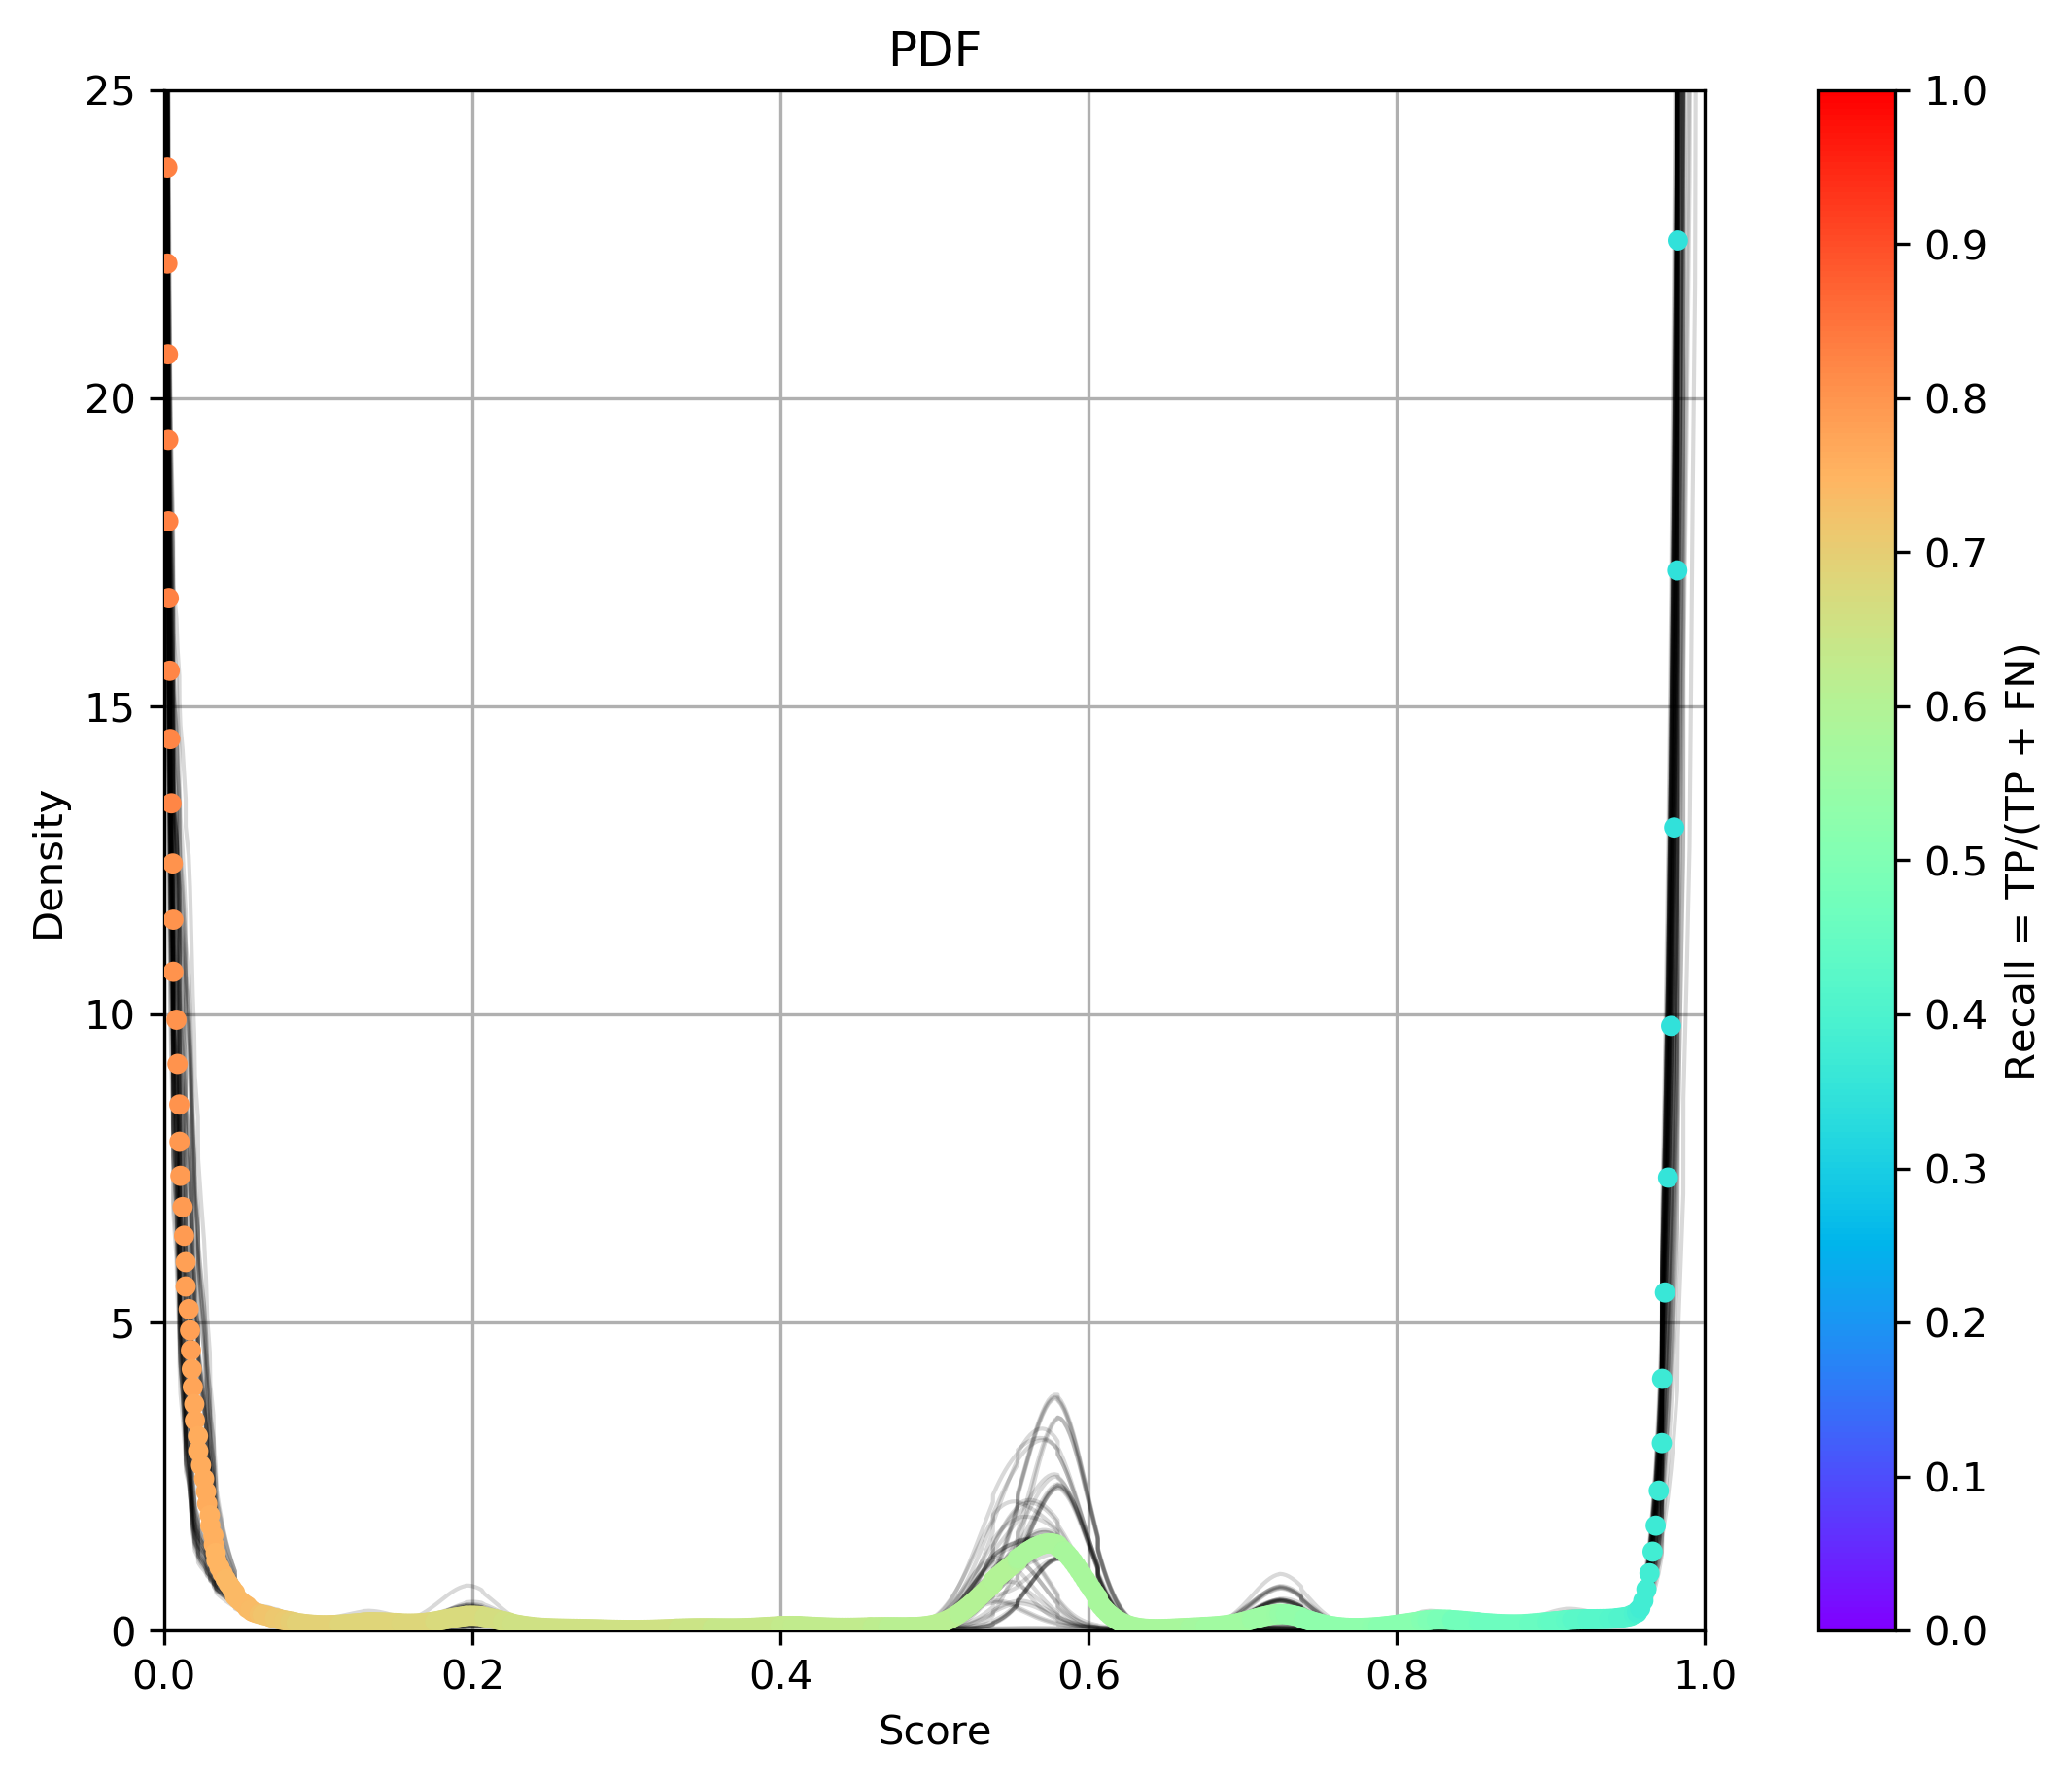

In [ ]:
mg.plot_dist(
    y_rng=[0, 25],
    bootstrapped=True,
    kind="pdf",
    kernel_size=10,
    dpi=300,
)